In [3]:
# Data processing
import pandas as pd
import numpy as np
# Data visualization
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
import seaborn as sns
# Model and performance
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.inspection import permutation_importance
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
import itertools
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [87]:
item_df0 = pd.read_csv('item_df0.csv')
item_df1 = pd.read_csv('item_df1.csv')
item_df2 = pd.read_csv('item_df2.csv')

### Creating Association Rules

In [89]:
frequent_items0 = apriori(item_df0, min_support=0.0005, use_colnames=True)
frequent_items0

,support,itemsets
0,0.001615,( Apple)
1,0.000706,( Baby Bok Choy)
2,0.002119,( Bag)
3,0.000807,( Bibb) Lettuce)
4,0.003431,( Bunch)
...,...,...
792,0.000606,"(Yogurt, Strained Low-Fat, Coconut)"
793,0.000606,"( Organic, Corn, Tortillas)"
794,0.000706,"( Hope, Hummus, Original Recipe)"
795,0.000706,"(Parsley, Italian (Flat), New England Grown)"


In [90]:
frequent_items1 = apriori(item_df1, min_support=0.0005, use_colnames=True)
frequent_items1

,support,itemsets
0,0.001409,( 2% Milkfat)
1,0.001761,( Bag)
2,0.000587,( Bibb) Lettuce)
3,0.001996,( Bunch)
4,0.000587,( Butter)
...,...,...
555,0.000528,"(Organic Whole Milk, Banana)"
556,0.000646,"( 2% Milkfat, Reduced Fat, Milk)"
557,0.000587,"( Bibb) Lettuce, Butter, Organic Butterhead (..."
558,0.000587,"(Yogurt, Strained Low-Fat, Coconut)"


In [91]:
frequent_items2 = apriori(item_df2, min_support=0.0005, use_colnames=True)
frequent_items2

,support,itemsets
0,0.000539,( Apricot & Banana Stage 2 Baby Food)
1,0.001497,( 2% Milkfat)
2,0.000539,( Aged White Cheddar)
3,0.002335,( Bag)
4,0.000539,( Bibb) Lettuce)
...,...,...
536,0.000539,"( Bibb) Lettuce, Butter, Organic Butterhead (..."
537,0.000718,"(Yogurt, Strained Low-Fat, Coconut)"
538,0.000659,( Kale Apple Ginger Romaine Spinach Cucumber C...
539,0.000539,"(Yogurt, Lowfat, Strawberry)"


### Support

In [92]:
assoc_rules0 = association_rules(frequent_items0, metric='support', min_threshold=0.0001)
assoc_rules0.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(Organic Red Radish),( Bunch),0.002119,0.003431,0.002119,1.000000,291.441176,0.002112,inf,0.998685
13,( Bunch),(Organic Red Radish),0.003431,0.002119,0.002119,0.617647,291.441176,0.002112,2.609842,1.000000
4,(Clementines),( Bag),0.002321,0.002119,0.001917,0.826087,389.795031,0.001913,5.737814,0.999755
5,( Bag),(Clementines),0.002119,0.002321,0.001917,0.904762,389.795031,0.001913,10.475628,0.999553
66,(YoKids Squeezers Organic Low-Fat Yogurt),( Strawberry),0.001514,0.002927,0.001514,1.000000,341.689655,0.001509,inf,0.998585
...,...,...,...,...,...,...,...,...,...,...
71,( Sunkissed in the Mediterranean),(Wild Non-Pareil Capers),0.000505,0.000505,0.000505,1.000000,1981.800000,0.000504,inf,1.000000
70,(Wild Non-Pareil Capers),( Sunkissed in the Mediterranean),0.000505,0.000505,0.000505,1.000000,1981.800000,0.000504,inf,1.000000
65,( Strawberry),(Fruit Spread),0.002927,0.000505,0.000505,0.172414,341.689655,0.000503,1.207724,1.000000
61,(Pita Chips),( Simply Naked),0.000505,0.000505,0.000505,1.000000,1981.800000,0.000504,inf,1.000000


In [93]:
assoc_rules1 = association_rules(frequent_items1, metric='support', min_threshold=0.0001)
assoc_rules1.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
35,(Milk),( Vitamin D),0.002994,0.002055,0.002055,0.686275,333.960784,0.002049,3.180950,1.000000
34,( Vitamin D),(Milk),0.002055,0.002994,0.002055,1.000000,333.960784,0.002049,inf,0.999059
27,(Milk),( Organic),0.002994,0.003699,0.001585,0.529412,143.126050,0.001574,2.117140,0.995996
26,( Organic),(Milk),0.003699,0.002994,0.001585,0.428571,143.126050,0.001574,1.744760,0.996700
12,(Organic Red Radish),( Bunch),0.001585,0.001996,0.001585,1.000000,500.941176,0.001582,inf,0.999588
...,...,...,...,...,...,...,...,...,...,...
21,( Crackers),(Crispy Wheat),0.000528,0.000528,0.000528,1.000000,1892.444444,0.000528,inf,1.000000
20,(Crispy Wheat),( Crackers),0.000528,0.000528,0.000528,1.000000,1892.444444,0.000528,inf,1.000000
38,(Organic Baby Spinach),(Banana),0.014267,0.030766,0.000528,0.037037,1.203845,0.000089,1.006513,0.171779
39,(Banana),(Organic Baby Spinach),0.030766,0.014267,0.000528,0.017176,1.203845,0.000089,1.002959,0.174703


In [94]:
assoc_rules2 = association_rules(frequent_items2, metric='support', min_threshold=0.0001)
assoc_rules2.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Clementines),( Bag),0.004311,0.002335,0.002095,0.486111,208.192664,0.002085,1.941402,0.999505
5,( Bag),(Clementines),0.002335,0.004311,0.002095,0.897436,208.192664,0.002085,9.707972,0.997526
40,( Vitamin D),(Milk),0.001736,0.002515,0.001676,0.965517,383.977011,0.001672,28.927079,0.999130
41,(Milk),( Vitamin D),0.002515,0.001736,0.001676,0.666667,383.977011,0.001672,2.994791,0.999910
30,( Organic),(Milk),0.003113,0.002515,0.001437,0.461538,183.549451,0.001429,1.852473,0.997658
...,...,...,...,...,...,...,...,...,...,...
33,( Peas and Broccoli Puree Stage 1),(Organic Pears),0.000539,0.000599,0.000539,1.000000,1670.300000,0.000539,inf,0.999940
32,(Organic Pears),( Peas and Broccoli Puree Stage 1),0.000599,0.000539,0.000539,0.900000,1670.300000,0.000539,9.994612,1.000000
25,( Strawberry),( Lowfat),0.002095,0.000718,0.000539,0.257143,357.921429,0.000537,1.345187,0.999300
24,( Lowfat),( Strawberry),0.000718,0.002095,0.000539,0.750000,357.921429,0.000537,3.991618,0.997923


### Confidence

In [111]:
assoc_rules0c = association_rules(frequent_items0, metric='confidence', min_threshold=0.05)
assoc_rules0c.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( Baby Bok Choy),( Sweet Baby Kale),0.000706,0.000706,0.000706,1.000000,1415.571429,0.000706,inf,1.000000
91,(Dressing),"( Jersey Sweet Onion, Calorie Free)",0.000706,0.000706,0.000706,1.000000,1415.571429,0.000706,inf,1.000000
89,( Jersey Sweet Onion),"( Calorie Free, Dressing)",0.000706,0.000706,0.000706,1.000000,1415.571429,0.000706,inf,1.000000
88,"( Calorie Free, Dressing)",( Jersey Sweet Onion),0.000706,0.000706,0.000706,1.000000,1415.571429,0.000706,inf,1.000000
87,"( Jersey Sweet Onion, Dressing)",( Calorie Free),0.000706,0.000706,0.000706,1.000000,1415.571429,0.000706,inf,1.000000
86,"( Jersey Sweet Onion, Calorie Free)",(Dressing),0.000706,0.000706,0.000706,1.000000,1415.571429,0.000706,inf,1.000000
85,(Organic Butterhead (Boston),"( Bibb) Lettuce, Butter)",0.000807,0.000807,0.000807,1.000000,1238.625000,0.000807,inf,1.000000
83,( Bibb) Lettuce),"( Butter, Organic Butterhead (Boston)",0.000807,0.000807,0.000807,1.000000,1238.625000,0.000807,inf,1.000000
82,"( Butter, Organic Butterhead (Boston)",( Bibb) Lettuce),0.000807,0.000807,0.000807,1.000000,1238.625000,0.000807,inf,1.000000
81,"( Bibb) Lettuce, Organic Butterhead (Boston)",( Butter),0.000807,0.000908,0.000807,1.000000,1101.000000,0.000807,inf,0.999899


In [96]:
assoc_rules1c = association_rules(frequent_items1, metric='confidence', min_threshold=0.05)
assoc_rules1c.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23,( Lowfat),(Yogurt),0.000822,0.001468,0.000822,1.000000,681.280000,0.000821,inf,0.999354
50,"(Yogurt, Coconut)",( Strained Low-Fat),0.000587,0.000587,0.000587,1.000000,1703.200000,0.000587,inf,1.000000
54,( Coconut),"(Yogurt, Strained Low-Fat)",0.000587,0.000587,0.000587,1.000000,1703.200000,0.000587,inf,1.000000
53,( Strained Low-Fat),"(Yogurt, Coconut)",0.000587,0.000587,0.000587,1.000000,1703.200000,0.000587,inf,1.000000
28,( Reduced Fat),(Milk),0.000646,0.002994,0.000646,1.000000,333.960784,0.000644,inf,0.997650
...,...,...,...,...,...,...,...,...,...,...
58,( Organic),"( Vitamin D, Milk)",0.003699,0.002055,0.001468,0.396825,193.106576,0.001460,1.654488,0.998515
42,(Milk),"( 2% Milkfat, Reduced Fat)",0.002994,0.000646,0.000646,0.215686,333.960784,0.000644,1.274177,1.000000
29,(Milk),( Reduced Fat),0.002994,0.000646,0.000646,0.215686,333.960784,0.000644,1.274177,1.000000
3,(Milk),( 2% Milkfat),0.002994,0.001409,0.000646,0.215686,153.065359,0.000642,1.273203,0.996451


In [97]:
assoc_rules2c = association_rules(frequent_items2, metric='confidence', min_threshold=0.05)
assoc_rules2c.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
36,(YoKids Squeezers Organic Low-Fat Yogurt),( Strawberry),0.001018,0.002095,0.001018,1.000000,477.228571,0.001016,inf,0.998921
22,( Kale Apple Ginger Romaine Spinach Cucumber C...,(Juice Beverage),0.000659,0.000659,0.000659,1.000000,1518.454545,0.000658,inf,1.000000
53,( Strained Low-Fat),"(Yogurt, Coconut)",0.000718,0.000718,0.000718,1.000000,1391.916667,0.000718,inf,1.000000
60,(Juice Beverage),( Kale Apple Ginger Romaine Spinach Cucumber C...,0.000659,0.000659,0.000659,1.000000,1518.454545,0.000658,inf,1.000000
33,( Peas and Broccoli Puree Stage 1),(Organic Pears),0.000539,0.000599,0.000539,1.000000,1670.300000,0.000539,inf,0.999940
...,...,...,...,...,...,...,...,...,...,...
64,(Yogurt),"( Strawberry, Lowfat)",0.001616,0.000539,0.000539,0.333333,618.629630,0.000538,1.499192,1.000000
39,( Strawberry),(Yogurt),0.002095,0.001616,0.000659,0.314286,194.426455,0.000655,1.455976,0.996946
25,( Strawberry),( Lowfat),0.002095,0.000718,0.000539,0.257143,357.921429,0.000537,1.345187,0.999300
66,( Strawberry),"(Yogurt, Lowfat)",0.002095,0.000659,0.000539,0.257143,390.459740,0.000537,1.345267,0.999533


### Lift

In [98]:
assoc_rules0c = association_rules(frequent_items0, metric='lift', min_threshold=0.05)
assoc_rules0c.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
36,( Grade A),(Cage Free Brown Eggs-Large),0.000505,0.000505,0.000505,1.000000,1981.800000,0.000504,inf,1.000000
92,"( Jalapeno Lime, Tortilla Chips)",( Clasico),0.000505,0.000505,0.000505,1.000000,1981.800000,0.000504,inf,1.000000
22,( Jalapeno Lime),( Clasico),0.000505,0.000505,0.000505,1.000000,1981.800000,0.000504,inf,1.000000
37,(Cage Free Brown Eggs-Large),( Grade A),0.000505,0.000505,0.000505,1.000000,1981.800000,0.000504,inf,1.000000
60,( Simply Naked),(Pita Chips),0.000505,0.000505,0.000505,1.000000,1981.800000,0.000504,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
30,( Organic),( Corn),0.003835,0.000807,0.000606,0.157895,195.572368,0.000602,1.186541,0.998717
68,(Yogurt),( Strawberry),0.001312,0.002927,0.000706,0.538462,183.986737,0.000703,2.160326,0.995871
69,( Strawberry),(Yogurt),0.002927,0.001312,0.000706,0.241379,183.986737,0.000703,1.316452,0.997484
56,( Organic),(Tortillas),0.003835,0.001009,0.000606,0.157895,156.457895,0.000602,1.186302,0.997434


In [99]:
assoc_rules1c = association_rules(frequent_items1, metric='lift', min_threshold=0.05)
assoc_rules1c.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
21,( Crackers),(Crispy Wheat),0.000528,0.000528,0.000528,1.000000,1892.444444,0.000528,inf,1.000000
20,(Crispy Wheat),( Crackers),0.000528,0.000528,0.000528,1.000000,1892.444444,0.000528,inf,1.000000
50,"( Butter, Organic Butterhead (Boston)",( Bibb) Lettuce),0.000587,0.000587,0.000587,1.000000,1703.200000,0.000587,inf,1.000000
49,"( Bibb) Lettuce, Organic Butterhead (Boston)",( Butter),0.000587,0.000587,0.000587,1.000000,1703.200000,0.000587,inf,1.000000
17,( Coconut),( Strained Low-Fat),0.000587,0.000587,0.000587,1.000000,1703.200000,0.000587,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
40,(Organic Whole Milk),(Banana),0.008983,0.030766,0.000528,0.058824,1.911989,0.000252,1.029812,0.481308
36,(Organic Hass Avocado),(Bag of Organic Bananas),0.014385,0.025364,0.000528,0.036735,1.448299,0.000164,1.011804,0.314053
37,(Bag of Organic Bananas),(Organic Hass Avocado),0.025364,0.014385,0.000528,0.020833,1.448299,0.000164,1.006586,0.317590
38,(Organic Baby Spinach),(Banana),0.014267,0.030766,0.000528,0.037037,1.203845,0.000089,1.006513,0.171779


In [100]:
assoc_rules2c = association_rules(frequent_items2, metric='lift', min_threshold=0.05)
assoc_rules2c.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
44,"( Bibb) Lettuce, Butter)",(Organic Butterhead (Boston),0.000539,0.000539,0.000539,1.000000,1855.888889,0.000539,inf,1.000000
13,(Organic Butterhead (Boston),( Butter),0.000539,0.000539,0.000539,1.000000,1855.888889,0.000539,inf,1.000000
49,(Organic Butterhead (Boston),"( Bibb) Lettuce, Butter)",0.000539,0.000539,0.000539,1.000000,1855.888889,0.000539,inf,1.000000
48,( Butter),"( Bibb) Lettuce, Organic Butterhead (Boston)",0.000539,0.000539,0.000539,1.000000,1855.888889,0.000539,inf,1.000000
47,( Bibb) Lettuce),"( Butter, Organic Butterhead (Boston)",0.000539,0.000539,0.000539,1.000000,1855.888889,0.000539,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
38,(Yogurt),( Strawberry),0.001616,0.002095,0.000659,0.407407,194.426455,0.000655,1.683964,0.996467
30,( Organic),(Milk),0.003113,0.002515,0.001437,0.461538,183.549451,0.001429,1.852473,0.997658
31,(Milk),( Organic),0.002515,0.003113,0.001437,0.571429,183.549451,0.001429,2.326069,0.997059
42,(Bag of Organic Bananas),(Organic Strawberries),0.025983,0.015865,0.000838,0.032258,2.033232,0.000426,1.016939,0.521728


### Compound conditions

In [108]:
assoc_rules0[(assoc_rules0['confidence'] >=.03) & (assoc_rules0['lift'] >=1)]\
            .sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( Baby Bok Choy),( Sweet Baby Kale),0.000706,0.000706,0.000706,1.000000,1415.571429,0.000706,inf,1.000000
91,(Dressing),"( Jersey Sweet Onion, Calorie Free)",0.000706,0.000706,0.000706,1.000000,1415.571429,0.000706,inf,1.000000
89,( Jersey Sweet Onion),"( Calorie Free, Dressing)",0.000706,0.000706,0.000706,1.000000,1415.571429,0.000706,inf,1.000000
88,"( Calorie Free, Dressing)",( Jersey Sweet Onion),0.000706,0.000706,0.000706,1.000000,1415.571429,0.000706,inf,1.000000
87,"( Jersey Sweet Onion, Dressing)",( Calorie Free),0.000706,0.000706,0.000706,1.000000,1415.571429,0.000706,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
11,( Bunch),(Flat Parsley),0.003431,0.000807,0.000807,0.235294,291.441176,0.000805,1.306637,1.000000
65,( Strawberry),(Fruit Spread),0.002927,0.000505,0.000505,0.172414,341.689655,0.000503,1.207724,1.000000
30,( Organic),( Corn),0.003835,0.000807,0.000606,0.157895,195.572368,0.000602,1.186541,0.998717
56,( Organic),(Tortillas),0.003835,0.001009,0.000606,0.157895,156.457895,0.000602,1.186302,0.997434


In [109]:
assoc_rules0.to_csv(r'C:\Users\p-mir\MS Data Science\Big Data Technologies\Final\assoc_rules0.csv', index=False)

In [130]:
assoc_rules1[(assoc_rules1['confidence'] >=.5) & (assoc_rules1['lift'] >=1)]\
            .sort_values('confidence', ascending=False)

assoc_rules1.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
21,( Crackers),(Crispy Wheat),0.000528,0.000528,0.000528,1.000000,1892.444444,0.000528,inf,1.000000
20,(Crispy Wheat),( Crackers),0.000528,0.000528,0.000528,1.000000,1892.444444,0.000528,inf,1.000000
50,"( Butter, Organic Butterhead (Boston)",( Bibb) Lettuce),0.000587,0.000587,0.000587,1.000000,1703.200000,0.000587,inf,1.000000
49,"( Bibb) Lettuce, Organic Butterhead (Boston)",( Butter),0.000587,0.000587,0.000587,1.000000,1703.200000,0.000587,inf,1.000000
17,( Coconut),( Strained Low-Fat),0.000587,0.000587,0.000587,1.000000,1703.200000,0.000587,inf,1.000000
16,( Strained Low-Fat),( Coconut),0.000587,0.000587,0.000587,1.000000,1703.200000,0.000587,inf,1.000000
15,(Organic Butterhead (Boston),( Butter),0.000587,0.000587,0.000587,1.000000,1703.200000,0.000587,inf,1.000000
14,( Butter),(Organic Butterhead (Boston),0.000587,0.000587,0.000587,1.000000,1703.200000,0.000587,inf,1.000000
52,( Butter),"( Bibb) Lettuce, Organic Butterhead (Boston)",0.000587,0.000587,0.000587,1.000000,1703.200000,0.000587,inf,1.000000
48,"( Bibb) Lettuce, Butter)",(Organic Butterhead (Boston),0.000587,0.000587,0.000587,1.000000,1703.200000,0.000587,inf,1.000000


In [104]:
assoc_rules1.to_csv(r'C:\Users\p-mir\MS Data Science\Big Data Technologies\Final\assoc_rules1.csv', index=False)

In [105]:
assoc_rules2[(assoc_rules2['confidence'] >=.5) & (assoc_rules2['lift'] >=1)]\
            .sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
36,(YoKids Squeezers Organic Low-Fat Yogurt),( Strawberry),0.001018,0.002095,0.001018,1.000000,477.228571,0.001016,inf,0.998921
33,( Peas and Broccoli Puree Stage 1),(Organic Pears),0.000539,0.000599,0.000539,1.000000,1670.300000,0.000539,inf,0.999940
1,( Apricot & Banana Stage 2 Baby Food),(Peach),0.000539,0.000778,0.000539,1.000000,1284.846154,0.000538,inf,0.999760
68,"( Organic, Vitamin D)",(Milk),0.001317,0.002515,0.001317,1.000000,397.690476,0.001314,inf,0.998801
44,"( Bibb) Lettuce, Butter)",(Organic Butterhead (Boston),0.000539,0.000539,0.000539,1.000000,1855.888889,0.000539,inf,1.000000
45,"( Bibb) Lettuce, Organic Butterhead (Boston)",( Butter),0.000539,0.000539,0.000539,1.000000,1855.888889,0.000539,inf,1.000000
46,"( Butter, Organic Butterhead (Boston)",( Bibb) Lettuce),0.000539,0.000539,0.000539,1.000000,1855.888889,0.000539,inf,1.000000
47,( Bibb) Lettuce),"( Butter, Organic Butterhead (Boston)",0.000539,0.000539,0.000539,1.000000,1855.888889,0.000539,inf,1.000000
48,( Butter),"( Bibb) Lettuce, Organic Butterhead (Boston)",0.000539,0.000539,0.000539,1.000000,1855.888889,0.000539,inf,1.000000
49,(Organic Butterhead (Boston),"( Bibb) Lettuce, Butter)",0.000539,0.000539,0.000539,1.000000,1855.888889,0.000539,inf,1.000000


In [106]:
assoc_rules2.to_csv(r'C:\Users\p-mir\MS Data Science\Big Data Technologies\Final\assoc_rules2.csv', index=False)

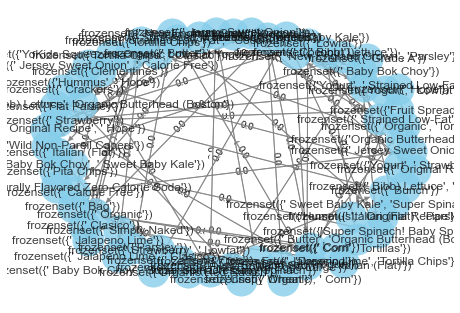

In [107]:
import networkx as nx
import matplotlib.pyplot as plt

# Assume 'rules' is a DataFrame containing the association rules generated by Apriori
G = nx.DiGraph()
for i in range(len(assoc_rules0)):
    G.add_edge(assoc_rules0.iloc[i]['antecedents'], 
               assoc_rules0.iloc[i]['consequents'], 
               weight=assoc_rules0.iloc[i]['support'])

pos = nx.spring_layout(G, k=0.5)

edge_labels = {(i, j): round(d['weight'], 2) 
               for i, j, d in G.edges(data=True)}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='grey', 
        width=1, font_size=12, node_size=1000, alpha=0.8)

plt.axis('off')
plt.show()

### Sample Recs

In [120]:
milk_antecedent = assoc_rules1[assoc_rules1['antecedents'] == {'Milk'}]
milk_antecedent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(Milk),( 2% Milkfat),0.002994,0.001409,0.000646,0.215686,153.065359,0.000642,1.273203,0.996451
27,(Milk),( Organic),0.002994,0.003699,0.001585,0.529412,143.126050,0.001574,2.117140,0.995996
29,(Milk),( Reduced Fat),0.002994,0.000646,0.000646,0.215686,333.960784,0.000644,1.274177,1.000000
35,(Milk),( Vitamin D),0.002994,0.002055,0.002055,0.686275,333.960784,0.002049,3.180950,1.000000
47,(Milk),"( 2% Milkfat, Reduced Fat)",0.002994,0.000646,0.000646,0.215686,333.960784,0.000644,1.274177,1.000000
65,(Milk),"( Organic, Vitamin D)",0.002994,0.001468,0.001468,0.490196,333.960784,0.001463,1.958659,1.000000


Text(0, 0.5, 'Recommended Items')

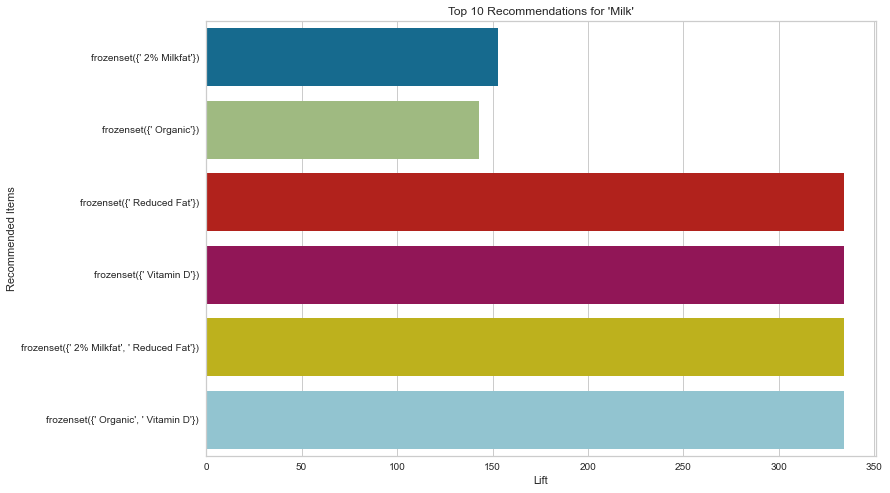

In [131]:
plt.figure(figsize = [12,8])

x = sns.barplot(x='lift', y='consequents', data=milk_antecedent)
plt.title("Top 10 Recommendations for 'Milk'")
plt.xlabel('Lift')
plt.ylabel('Recommended Items')